图像预处理

In [2]:
import cv2 as cv

In [4]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img=cv.imread("day3_5.jpg")
gray1=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray =cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread("day3_2.png",0)
w, h = template.shape[::-1]
ret, thresh = cv.threshold(gray, 170, 255, cv.THRESH_BINARY)
kernel = np.ones((1,1),np.uint8)
erosion = cv.erode(thresh,kernel,iterations = 2)
res1 = cv.matchTemplate(gray1,template,cv.TM_CCOEFF_NORMED)
threshold1 = 0.8
loc = np.where(res1 >= threshold1)
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    point = (pt[0]+int(w/2), pt[1]+int(h/2))
    color = (255, 0, 0)     
    radius = 3              
    thickness = 3        
    cv.circle(img, point, radius, color, thickness)
contours, hierarchy = cv.findContours(erosion, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
val=[]
for i in contours:         
    area = cv.contourArea(i)
    if  area>300:
        val.append(i)
cv.drawContours(img, val, -1, (0, 255, 0), 2)

cv.imshow("title",img)
cv.waitKey(0)


-1

In [27]:
#成功
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def is_circular(contour,threshold1=0.8):
    perimeter=cv.arcLength(contour,True)
    area=cv.contourArea(contour)
    if perimeter==0:
        return False
    circularity=4*3.1415926*area/(perimeter*perimeter)
    return circularity>threshold1
img=cv.imread("day3_1.png")
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh=cv.threshold(gray,180,255,cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
circular_contours=tuple([contour for contour in contours if is_circular(contour)])
cnt=0
val=1000
count=0
for contour in circular_contours:
    if cv.contourArea(contour)>100:
        if val>cv.contourArea(contour):
            count=cnt
            val=cv.contourArea(contour)
    cnt=cnt+1
cv.drawContours(img,circular_contours,count,(0,255,0),3)
cv.imshow("t",img)
cv.waitKey(0)






-1

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def is_circular(contour,threshold1=0.8):
    perimeter=cv.arcLength(contour,True)
    area=cv.contourArea(contour)
    if perimeter==0:
        return False
    circularity=4*3.1415926*area/(perimeter*perimeter)
    return circularity>threshold1
img_rgb = cv.imread('day3_5.jpg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('day3_2.jpg',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

True

In [77]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def is_circular(contour,threshold1=0.89):
    perimeter=cv.arcLength(contour,True)
    area=cv.contourArea(contour)
    if perimeter==0:
        return False
    circularity=4*3.1415926*area/(perimeter*perimeter)
    return circularity>threshold1
cap = cv.VideoCapture('day3_3.MP4')
while cap.isOpened():
    ret, img = cap.read()
    img=cv.resize(img,(750,435),interpolation=cv.INTER_AREA)
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret,thresh=cv.threshold(gray,190,255,cv.THRESH_BINARY)

    #漫水法
    seed_point = (100, 100)
    # 定义填充颜色
    fill_color = (255, 0, 0)
    # 创建掩膜图像，全黑
    mask = np.zeros((thresh.shape[0] + 2, thresh.shape[1] + 2), np.uint8)
    # 执行漫水法
    cv.floodFill(thresh, mask, seed_point, fill_color)
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (2,2))
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
    contours, hierarchy = cv.findContours(closing, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


    cnt=0
    val=160
    count=0
    for contour in contours:
        if is_circular(contour) and val>cv.contourArea(contour):
            count=cnt
            val=cv.contourArea(contour)
        cnt=cnt+1
    if count!=0:
        cv.drawContours(img,contours,count,(0,0,255),3)
    cv.imshow('frame', img)
    if cv.waitKey(25) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

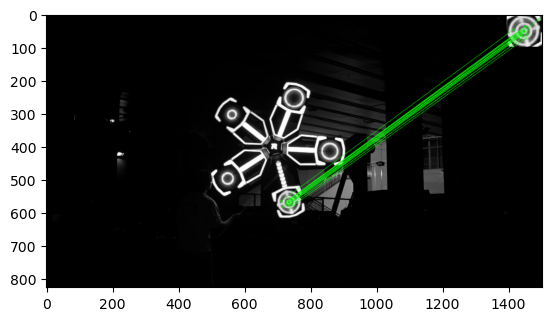

(<matplotlib.image.AxesImage at 0x1d78703bd90>, None)

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('day3_1.png',0)          # 索引图像
img2 = cv.imread('day3_2.png',0) # 训练图像
# 初始化SIFT检测器
sift = cv.xfeatures2d.SIFT_create()
# 用SIFT找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# ＃根据Lowe的比率测试存储所有符合条件的匹配项。
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # 用绿色绘制匹配
                   singlePointColor = None,
                   matchesMask = matchesMask, # 只绘制内部点
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [5]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img=cv.imread("day3_1.png")
gray1=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray =cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread("day3_2.png",0)
w, h = template.shape[::-1]
ret, thresh = cv.threshold(gray, 170, 255, cv.THRESH_BINARY)
kernel = np.ones((1,1),np.uint8)
erosion = cv.erode(thresh,kernel,iterations = 2)
res1 = cv.matchTemplate(gray1,template,cv.TM_CCOEFF_NORMED)
threshold1 = 0.8
loc = np.where(res1 >= threshold1)
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    point = (pt[0]+int(w/2), pt[1]+int(h/2))
    color = (255, 0, 0)     
    radius = 3              
    thickness = 3        
    cv.circle(img, point, radius, color, thickness)
contours, hierarchy = cv.findContours(erosion, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
val=[]
for i in contours:         
    area = cv.contourArea(i)
    if  area>300:
        val.append(i)
cv.drawContours(img, val, -1, (0, 255, 0), 2)

cv.imshow("title",img)
cv.waitKey(0)


-1

-1

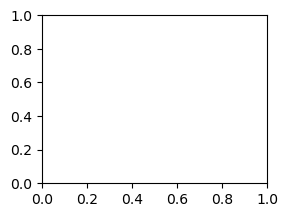

In [2]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2,2,1)
img=cv.imread("day3_5.jpg")
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 180, 255, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
# erosion=cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel)
# erosion=cv.morphologyEx(erosion,cv.MORPH_CLOSE,kernel)
# erosion=cv.morphologyEx(erosion,cv.MORPH_OPEN,kernel)
erosion=cv.erode(thresh,kernel,iterations=1)
dilation=cv.dilate(erosion,kernel,iterations=1)
erosion1=cv.erode(dilation,kernel,iterations=3)
erosion1=cv.dilate(erosion1,kernel,iterations=15)
contours, hierarchy = cv.findContours(erosion1, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
val=[]
cnt=0
count=0
for i in contours:         
    area = cv.contourArea(i)
    if cnt==0:
        val=area
    else:
        if val>area:
            val=area
            count=cnt
    cnt=cnt+1
cv.drawContours(img, contours, count, (0, 255, 0), 2)
cv.imshow("img",img)
# val=[]
# for i in contours:         
#     area = cv.contourArea(i)
#     if  area>400 and area<800:
#         val.append(i)

# cv.imshow("thresh",thresh)
# cv.imshow("dilation",dilation)
# cv.imshow("erosion1",erosion1)
# cv.imshow("test",test)
# cv.imshow("dilation",dilation)
cv.waitKey(0)

In [59]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
cap = cv.VideoCapture('day3_3.MP4')
while cap.isOpened():
    ret, img = cap.read()
    img=cv.resize(img,(750,435),interpolation=cv.INTER_AREA)
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 170, 255, cv.THRESH_BINARY)
    kernel = np.ones((1,1),np.uint8)
    erosion=cv.erode(thresh,kernel,iterations=1)
    dilation=cv.dilate(erosion,kernel,iterations=1)
    erosion1=cv.erode(dilation,kernel,iterations=3)
    erosion1=cv.dilate(erosion1,kernel,iterations=15)
    contours, hierarchy = cv.findContours(erosion1, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    val=[]
    val=[]
    cnt=0
    count=0
    for i in contours:         
        area = cv.contourArea(i)
        if cnt==0:
            val=area
        else:
            if val>area:
                val=area
                count=cnt
        cnt=cnt+1
    cv.drawContours(img,contours, count, (0, 0, 255), 5)
    # template = cv.imread('day3_2.png',0)
    
    cv.imshow('frame', img)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
